In [1]:
using LinearAlgebra, PyPlot

# Chutes and Ladders

*Chutes and Ladders*, a version of an ancient Indian board game called [Snakes and Ladders](https://en.wikipedia.org/wiki/Snakes_and_Ladders), is a simple and popular children's board game.

* There are 100 numbered spaces, plus an unmarked starting position 0.
* Players take turns generating a random number from 1 to 6 (e.g. by rolling a die or spinning a wheel), and move a marker that many spaces.
* If you land at the bottom of a ladder or the top of a chute (snake), then your marker is transported across the board up the ladder or down the chute.
* The first player whose marker reaches position 100 wins.

Here is an image of a game board:

<img src="https://i.ytimg.com/vi/1AIY46PkETs/maxresdefault.jpg" width="512" height="384" />

A simple question that one might ask is: **how many moves does it typically take to finish the game**?

It turns out that an elegant analysis of this game is possible via [Markov matrices](https://en.wikipedia.org/wiki/Stochastic_matrix).  Reviews of this idea can be found in [this 2011 blog post](http://www.datagenetics.com/blog/november12011/) or [this article by Jeffrey Humpherys at BYU](https://math.byu.edu/~jeffh/mathematics/games/chutes/chutes.html).

The key idea is to represent the board by a 101×101 matrix M, whose entry $M_{i,j}$ is the **probability of going from position j to position i**.

## Simplified game: No chutes or ladders

To start with, let's analyze a boring version of the game, in which there are no chutes or ladders.  On each turn, you simply move forward 1 to 6 spaces until you reach the end.

The corresponding matrix M is essentially:

$$
M_{i,j} = \begin{cases}
              \frac{1}{6} & j \in \{i-1,i-2,\ldots,i-6\} \\
              0 & \mbox{otherwise}
         \end{cases}
$$
since there is a 1/6 chance of moving 1,2,…,6 spaces from $j$.  However, the final row is modified, because you can get to space 100 from space 99 if you roll anything, from space 98 if you roll a 2 or more, etcetera.  And once you get to position 100, you stay there.

In [2]:
M = zeros(101,101)
for i = 2:100
    M[i,max(1,i-6):(i-1)] .= 1/6
end
# last row
for i = 1:6
    M[101,101-i] = (7-i)/6 # = 6/6, 5/6, 4/6, ..., 1/6
end
M[101,101] = 1 # once we get to the last space, we stay there
M

101×101 Matrix{Float64}:
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0  0.0
 0.166667  0.0       0.0       0.0          0.0       0.0       0.0  0.0
 0.166667  0.166667  0.0       0.0          0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.0          0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.166667     0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.166667  …  0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.166667     0.0       0.0       0.0  0.0
 0.0       0.166667  0.166667  0.166667     0.0       0.0       0.0  0.0
 0.0       0.0       0.166667  0.166667     0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.166667     0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0  0.0
 ⋮                        

Now, we start on position 0, corresponding to $j=1$.  This is described by the vector

$$
e_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{pmatrix}
$$

After one move, our probability of being on each spot is given by 


$$
M e_1 = \begin{pmatrix} 0 \\ 1/6 \\ 1/6 \\ 1/6 \\ 1/6 \\ 1/6 \\ 1/6 \\ 0 \\ \vdots \\ 0 \end{pmatrix}
$$

(the first column of M).

In [3]:
e₁ = zeros(101); e₁[1] = 1
M*e₁

101-element Vector{Float64}:
 0.0
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.16666666666666666
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

That is, there is a 1/6 chance of being in positions 1, 2, 3, 4, 5, or 6.

After *two* moves, the probability distribution is given by $M^2 e_1$:

In [4]:
M^2 * e₁

101-element Vector{Float64}:
 0.0
 0.0
 0.027777777777777776
 0.05555555555555555
 0.08333333333333333
 0.1111111111111111
 0.13888888888888887
 0.16666666666666663
 0.13888888888888887
 0.1111111111111111
 0.08333333333333333
 0.05555555555555555
 0.027777777777777776
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

And so on.

In fact, the matrix $M$ is precisely a **Markov matrix.**  It has the property that the **sum of every column is 1**, as can be checked in Julia by:

In [5]:
sum(M, dims=1) # sum M along the first dimension, i.e. sum Mᵢⱼ over i, i.e. sum each column

1×101 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

The eigenvalues of this matrix are weird looking: there is a single steady state (eigenvalue 1), and all other eigenvalues are zero!

In [6]:
eigvals(M)

101-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

What is actually happening here is that this matrix is not diagonalizable — it is [defective](https://en.wikipedia.org/wiki/Defective_matrix).  The matrix $X$ of eigenvectors is singular:

In [7]:
λ, X = eigen(M)
det(X)

0.0

Let's not worry about that for now (we will cover defective matrices later), and instead focus on the **steady-state eigenvalue λ=1**.  The corresponding eigenvector is just the unit vector $e_{101}$, because the steady state is the situation where we have reached the last spot on the board, at which point we stay there forever:

In [8]:
X[:,end]

101-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

Let's plot this probability distribution as it evolves over many moves, plotting it on a 2d grid that resembles the usual Chutes and Ladders board.

In [9]:
# Plot the probabilities on something like a chutes and ladders board.  We won't show the starting position (0)
# since that is not on the board.
function plotchutes(p)
    P = transpose(reshape(p[2:101], 10,10)) # reshape to a 10×10 array and transpose to row-major
    # every other row should be reversed, corresponding to how players "zig-zag" across the board:
    for i = 2:2:10
        P[i,:] = reverse(P[i,:])
    end
    imshow(P, aspect="equal", cmap="Reds", norm=PyPlot.matplotlib["colors"]["LogNorm"](vmin=1e-3, vmax=1), origin="lower", interpolation="none")
    colorbar(label="probability")
    xticks(-0.5:1:10, visible=false)
    yticks(-0.5:1:10, visible=false)
    grid()
    for i = 1:10, j = 1:10
        n = (i-1)*10 + j
        x = iseven(i) ? 10-j : j-1
        y = i-1
        text(x,y, "$n", horizontalalignment="center", verticalalignment="center")
    end
end

plotchutes (generic function with 1 method)

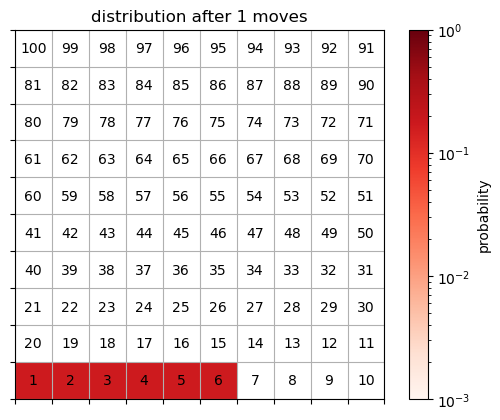

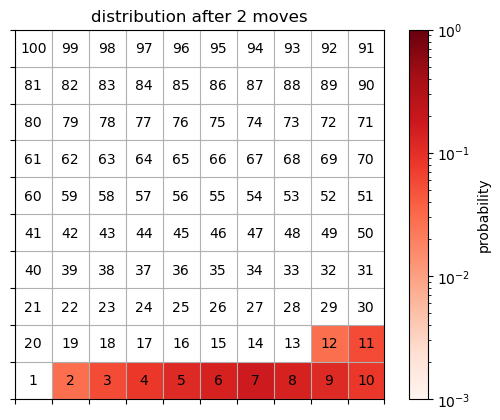

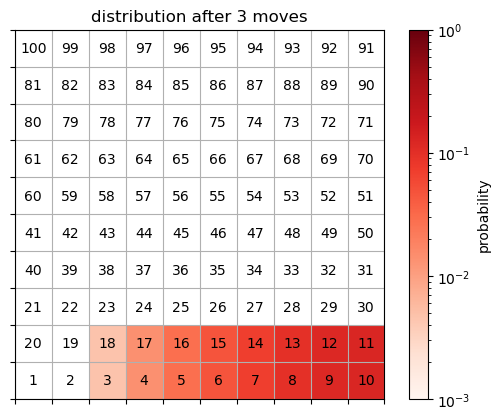

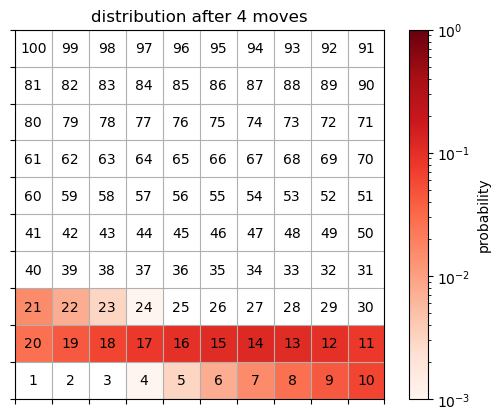

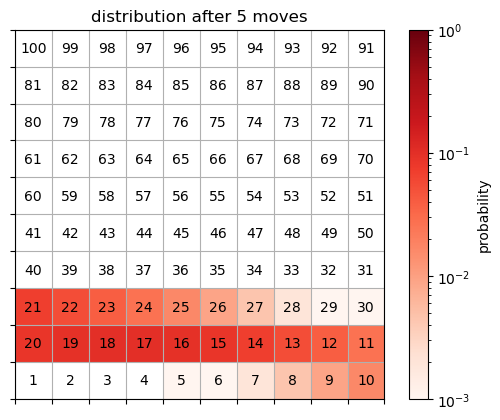

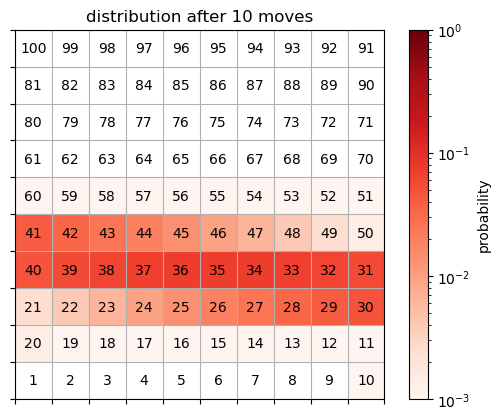

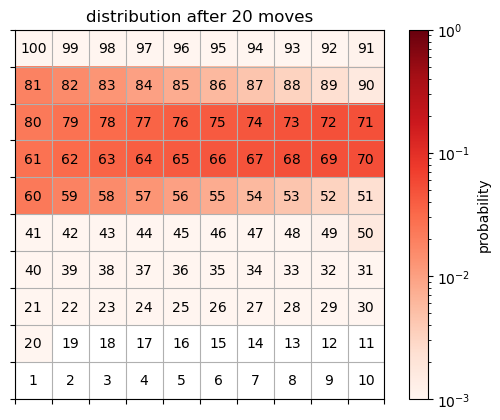

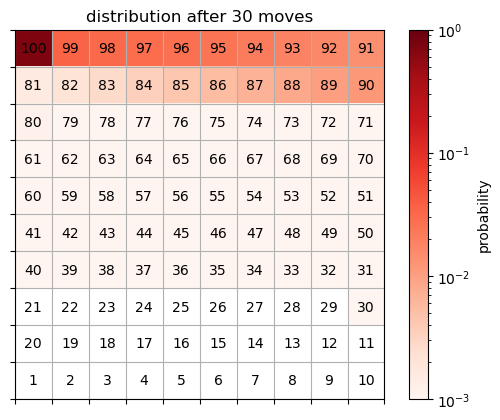

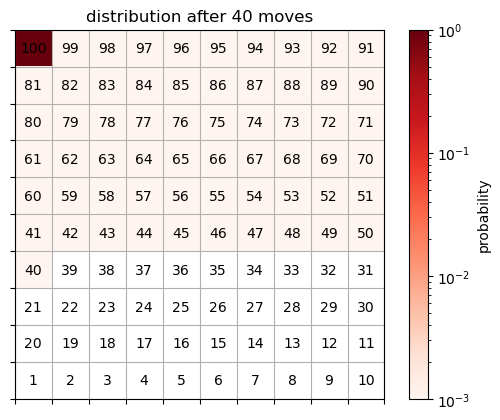

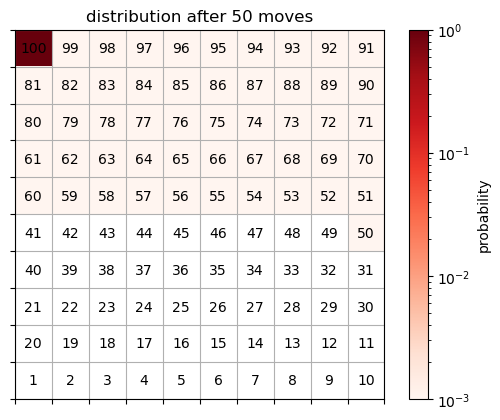

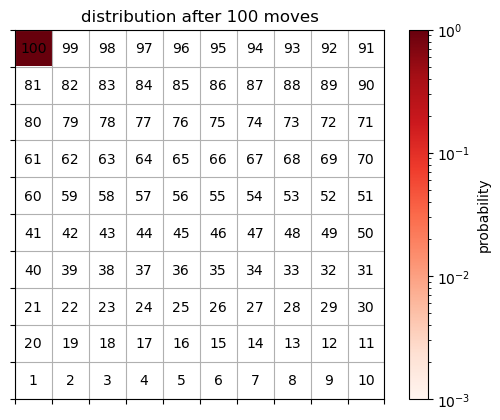

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/stevenj/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [10]:
fig = figure()
# using Interact
# @manipulate for n in slider(1:100, value=1)  
for n in (1,2,3,4,5,10,20,30,40,50,100)
    display(
    withfig(fig) do
        plotchutes(M^n*e₁)
        title("distribution after $n moves")
    end
    )
end

This is a boring game: you move forward monotonically along the board until you reach the end.  After 100 moves, the probability of having reached the end is 100%, because on each turn you move at least 1 space forward:

In [11]:
M^100*e₁

101-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.9999999999999983

We can plot the probability $e_{101}^T M^n e_1$ of finishing the game after $≤ n$ steps (with a single player) as a function of $n$:

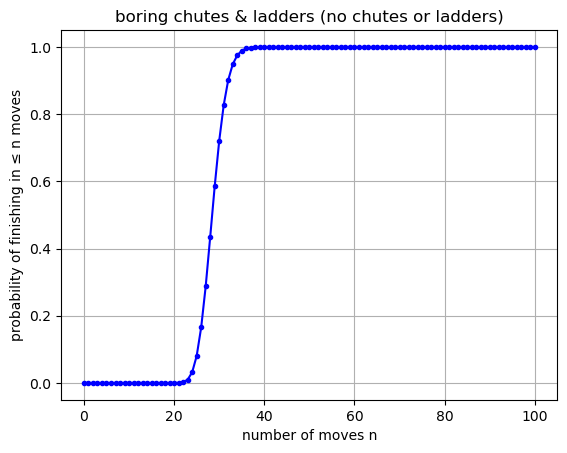

PyObject Text(0.5, 1.0, 'boring chutes & ladders (no chutes or ladders)')

In [12]:
plot(0:100, [(M^n * e₁)[end] for n = 0:100], "b.-")
xlabel("number of moves n")
ylabel("probability of finishing in ≤ n moves")
grid()
title("boring chutes & ladders (no chutes or ladders)")

If $p(n) = e_{101}^T M^n e_1$ is the probability of finishing in $≤ n$ moves, then the probability of finishing in exactly $n$ moves is $p(n) - p(n-1)$.  The Julia `diff` function will compute this difference for us given a vector of $p$ values:

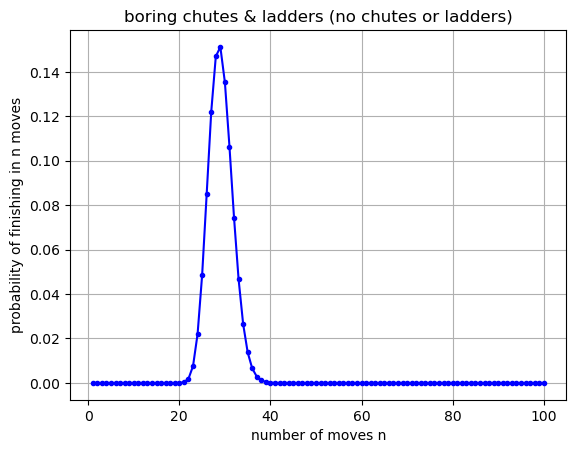

PyObject Text(0.5, 1.0, 'boring chutes & ladders (no chutes or ladders)')

In [13]:
plot(1:100, diff([(M^n * e₁)[end] for n = 0:100]), "b.-")
xlabel("number of moves n")
ylabel("probability of finishing in n moves")
grid()
title("boring chutes & ladders (no chutes or ladders)")

And the expected number of moves is

$$
\sum_{n=1}^\infty n [p(n)-p(n-1)]
$$

In [14]:
sum((1:100) .* diff([(M^n * e₁)[end] for n = 0:100]))

29.04761904761901

## Adding chutes and ladders

Now, we will add in the effect of chutes and ladders.   After you make each move represented by $M$ above, then we additionally go up a ladder or down a chute if we landed on one.  We represent this by a transition matrix $T$, where $T_{ij} = 1$ if there is a ladder/chute from $j$ to $i$.  For positions $j$ with no chute or ladder, we set $T_{jj}=1$.

The following is the list of chutes and ladders from the game board shown at the top:

In [15]:
T = zeros(101,101)

for t in (1=>39, 4=>14, 9=>31, 28=>84, 36=>44, 51=>67, 80=>100, 71=>91, # ladders
          16=>6, 47=>26, 49=>11, 56=>53, 64=>60, 92=>73, 95=>75, 98=>78) # chutes
    T[t[2]+1,t[1]+1] = 1
end

# Set T[j,j] = 1 in spaces with no chute/ladder
for j = 1:101
    if all(T[:,j] .== 0)
        T[j,j] = 1
    end
end

The matrix T is also a Markov matrix!

In [16]:
sum(T,dims=1)

1×101 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

Making the move $M$ followed by the transition $T$ is represented by their product $TM$, which is also a Markov matrix.  (The product of any Markov matrices is also a Markov matrix.)

In [17]:
sum(T*M, dims=1)

1×101 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

After a single move, the probability distribution is $TM e_1$, and we see the effect of the two ladders that can be reached in a single move:

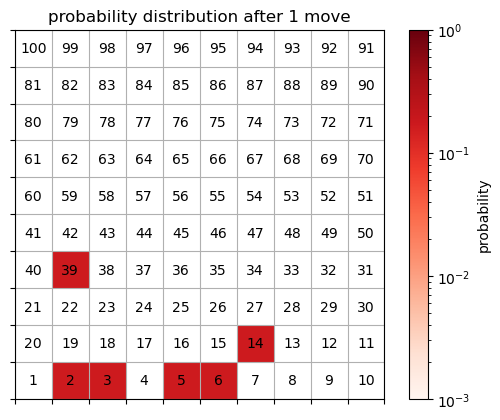

PyObject Text(0.5, 1.0, 'probability distribution after 1 move')

In [18]:
plotchutes(T*M*e₁)
title("probability distribution after 1 move")

As above, the probability distribution after $n$ moves is $(TM)^n e_1$, and it is interesting to plot this:

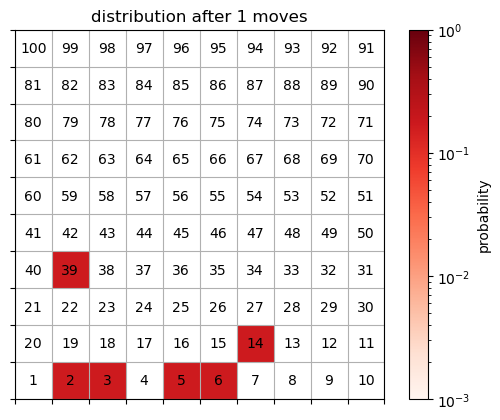

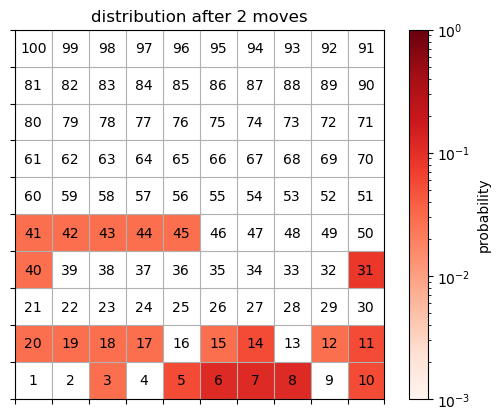

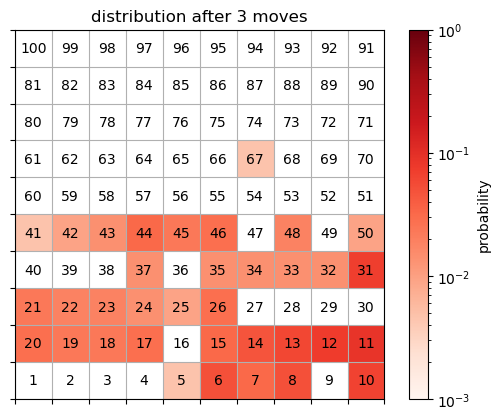

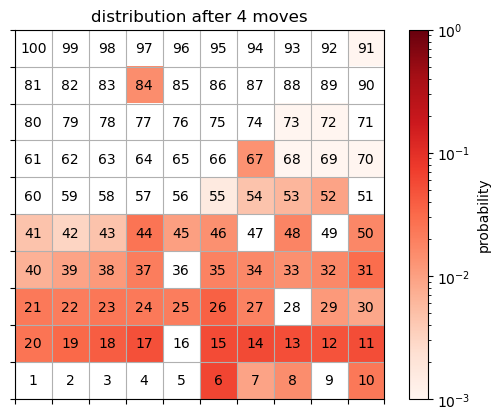

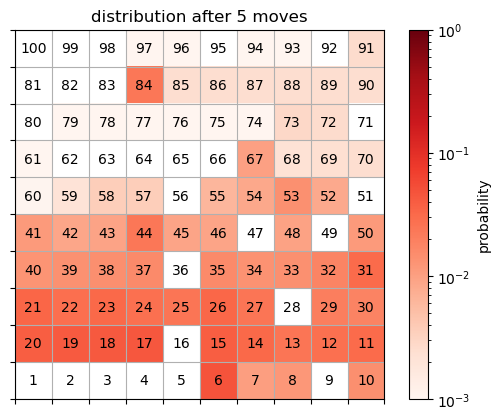

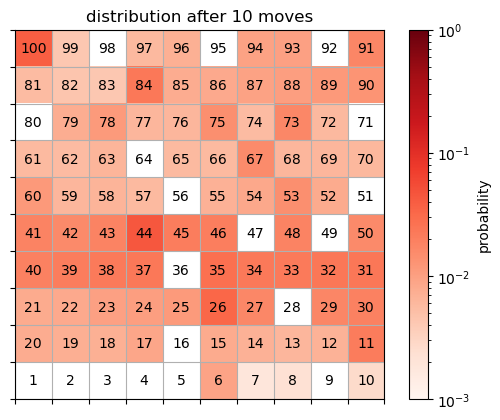

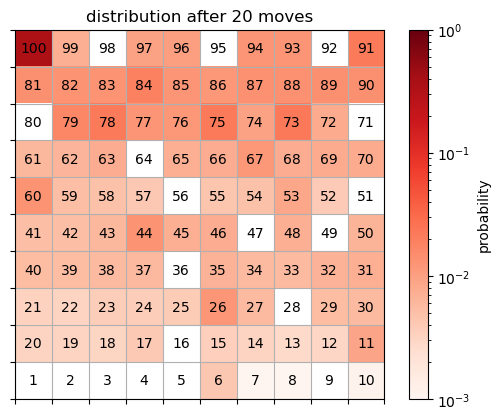

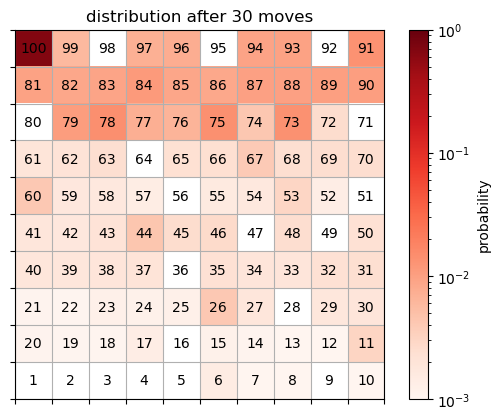

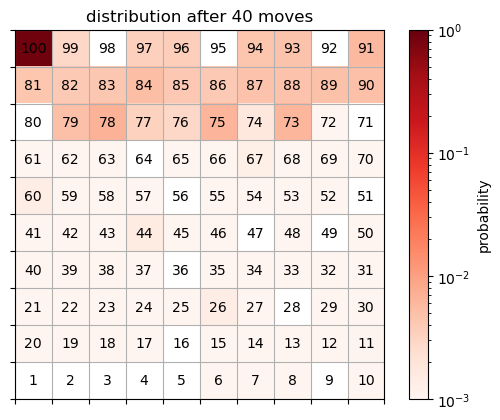

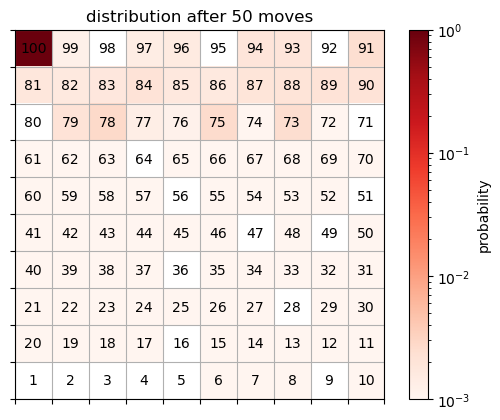

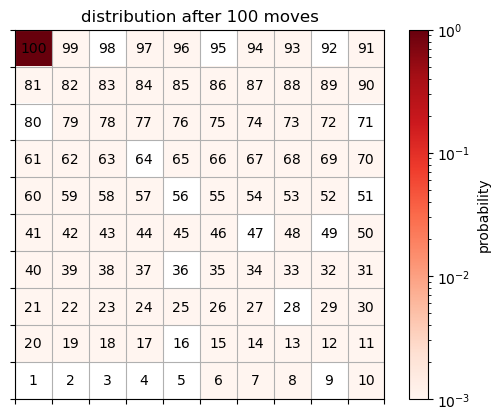

In [19]:
fig = figure()
# using Interact
# @manipulate for n in slider(1:100, value=1)
for n in (1,2,3,4,5,10,20,30,40,50,100)
    display(
    withfig(fig) do
        plotchutes((T*M)^n*e₁)
        title("distribution after $n moves")
    end
    )
end

Games can end much more quickly because of the ladders, but they can also take much longer because of the chutes.  Let's plot the probability distribution vs. $n$ as before:

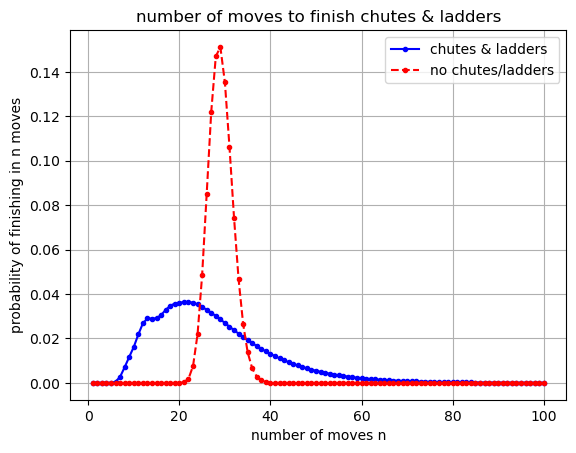

PyObject <matplotlib.legend.Legend object at 0x7fd64bd7e910>

In [20]:
plot(1:100, diff([((T*M)^n * e₁)[end] for n = 0:100]), "b.-")
plot(1:100, diff([(M^n * e₁)[end] for n = 0:100]), "r.--")
xlabel("number of moves n")
ylabel("probability of finishing in n moves")
grid()
title("number of moves to finish chutes & ladders")
legend(["chutes & ladders", "no chutes/ladders"])

The expected number of moves (for a single player) is:

In [21]:
sum((1:1000) .* diff([((T*M)^n * e₁)[end] for n = 0:1000]))

27.130202016993284

Amazingly, this is about the same as the 29 moves expected when there are no chutes and ladders, but the variance is much larger!

(In principle, we should actually sum for `n=0` to `∞`, but because the probability $p(n)-p(n-1)$ decays exponentially for large `n` we can just truncate the sum.)

And unlike the boring version, the probability of the game finishing never reaches 100%.  If you are unlucky, you could be trapped playing chutes and ladders for all eternity!  Let's plot $1-p(n)$ vs. $n$:

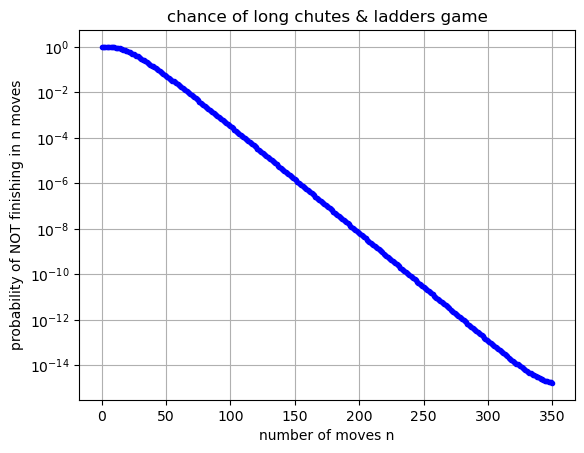

PyObject Text(0.5, 1.0, 'chance of long chutes & ladders game')

In [22]:
semilogy(0:350, [1-((T*M)^n * e₁)[end] for n = 0:350], "b.-")
xlabel("number of moves n")
ylabel("probability of NOT finishing in n moves")
grid()
title("chance of long chutes & ladders game")

Fortunately, the probability of a long game decreases exponentially fast with $n$.

# Absorbing Markov matrix

It turns out that the matrix $M$ (and $TM$) for this problem is something called an [absorbing Markov matrix](https://en.wikipedia.org/wiki/Absorbing_Markov_chain).

It is "absorbing" because the final position 101 (spot 100 on the board) cannot be escaped, and can be reached from every other position.  This has two consequences:

* Every initial vector eventually reaches this "absorbing" steady state, even though it is not a positive Markov matrix.

* There are nice analytical formulas for the expected number of moves, the variance, etcetera.  We don't actually have to sum up $n [p(n) - p(n-1)]$ as above.

Deriving these nice formulas is not too hard, but is a bit outside the scope of 18.06.  But, just for fun, here is the "clever way" to compute the expected number of moves to finish *Chutes & Ladders*:

In [23]:
A = (T*M)'[1:100,1:100]  # the 100x100 upper-left corner of (TM)ᵀ
N = inv(I - A)           # N[i,j] = expected number of visits to i starting at j
(N * ones(100))[1]       # expected number of moves to finish starting at 1

27.130202016993298

This matches our brute-force calculation from above!